## 1) Import the required packages

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from collections import Counter,namedtuple,defaultdict,OrderedDict
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## 2) Load the AdmissionsCorePopulatedTable dataset

In [4]:
data_AdmissionsCorePopulatedTable=pd.read_csv("/content/drive/My Drive/Colab Notebooks/AdmissionsCorePopulatedTable.txt",sep='\t')
data_AdmissionsCorePopulatedTable.head()

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,5,2011-03-23 00:14:52.237,2011-03-28 01:57:56.467
1,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1,1974-02-10 00:04:28.357,1974-02-16 21:04:43.333
2,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,2,1991-05-22 15:08:52.743,1991-05-29 12:30:08.737
3,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,3,1995-02-26 08:01:26.477,1995-02-28 16:45:04.407
4,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,4,2005-03-17 04:51:15.747,2005-04-04 04:04:14.160


In [5]:
data_AdmissionsCorePopulatedTable.shape

(361760, 4)

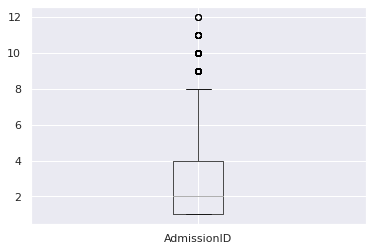

In [6]:
data_AdmissionsCorePopulatedTable.boxplot();

In [7]:
X=data_AdmissionsCorePopulatedTable.AdmissionID
X.head(10)

0    5
1    1
2    2
3    3
4    4
5    5
6    1
7    2
8    3
9    1
Name: AdmissionID, dtype: int64

In [8]:
remove_outliers_AdmissionID=X.between(X.quantile(0.05),X.quantile(0.9))
remove_outliers_AdmissionID.head()

0    True
1    True
2    True
3    True
4    True
Name: AdmissionID, dtype: bool

In [9]:

print(str(X[remove_outliers_AdmissionID].size)+"/"+str(X.size) + " remaining data points")

344300/361760 remaining data points


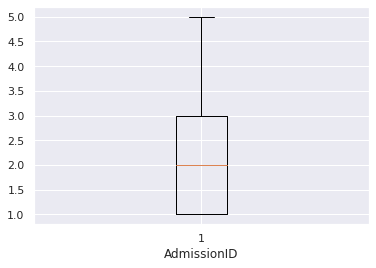

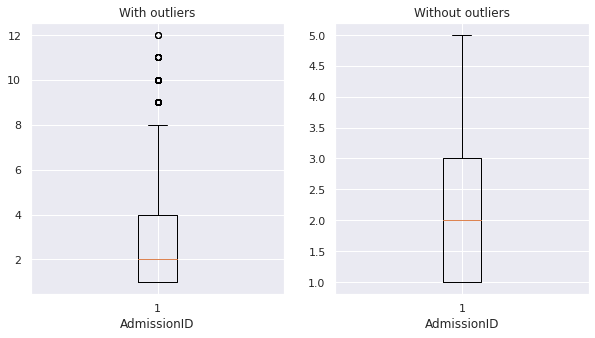

In [10]:
plt.boxplot(X[remove_outliers_AdmissionID])
plt.xlabel("AdmissionID")
figure,axis=plt.subplots(1,2,figsize=(10,5))
axis[0].set_title("With outliers")
axis[0].set_xlabel("AdmissionID")
axis[0].boxplot(X);

axis[1].set_title("Without outliers")
axis[1].set_xlabel("AdmissionID")
axis[1].boxplot(X[remove_outliers_AdmissionID]);

In [11]:
data_AdmissionsCorePopulatedTable['clean_AdmissionID']=X[remove_outliers_AdmissionID]
data_AdmissionsCorePopulatedTable.head()
data_AdmissionsCorePopulatedTable.isna().sum().to_frame().T
data_AdmissionsCorePopulatedTable.drop(labels='AdmissionID',axis=1,inplace=True)
data_AdmissionsCorePopulatedTable.head()
data_AdmissionsCorePopulatedTable.dropna(axis=0,inplace=True)
data_AdmissionsCorePopulatedTable.clean_AdmissionID = data_AdmissionsCorePopulatedTable.clean_AdmissionID.astype(int)
data_AdmissionsCorePopulatedTable.head()

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,2011-03-23 00:14:52.237,2011-03-28 01:57:56.467,5
1,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1974-02-10 00:04:28.357,1974-02-16 21:04:43.333,1
2,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1991-05-22 15:08:52.743,1991-05-29 12:30:08.737,2
3,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1995-02-26 08:01:26.477,1995-02-28 16:45:04.407,3
4,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,2005-03-17 04:51:15.747,2005-04-04 04:04:14.160,4


In [12]:
data_AdmissionsCorePopulatedTable.isna().sum().to_frame().T

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID
0,0,0,0,0


## 3) Load the AdmissionsDiagnosisCorePopulatedTable dataset


In [14]:
data_AdmissionsDiagnosesCorePopulatedTable=pd.read_csv("/content/drive/My Drive/Colab Notebooks/AdmissionsDiagnosesCorePopulatedTable.txt",sep='\t')
data_AdmissionsDiagnosesCorePopulatedTable.head()

,PatientID,AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,54C6E968-45B3-46B1-A64F-2CE3124F2A65,3,F80.1,Expressive language disorder
1,54C6E968-45B3-46B1-A64F-2CE3124F2A65,4,R04.81,Acute idiopathic pulmonary hemorrhage in infants
2,54C6E968-45B3-46B1-A64F-2CE3124F2A65,5,I36,Nonrheumatic tricuspid valve disorders
3,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,1,H16.43,Localized vascularization of cornea
4,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,2,M05.161,Rheumatoid lung disease with rheumatoid arthri...


In [15]:
data_AdmissionsDiagnosesCorePopulatedTable.shape

(361760, 4)

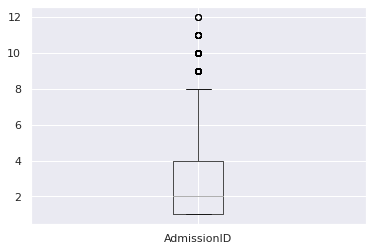

In [16]:
data_AdmissionsDiagnosesCorePopulatedTable.boxplot();

344300/361760 remaining data points


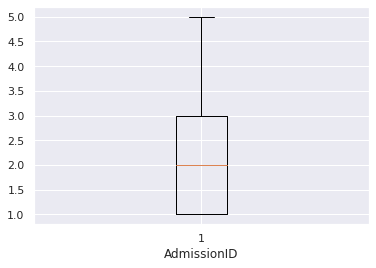

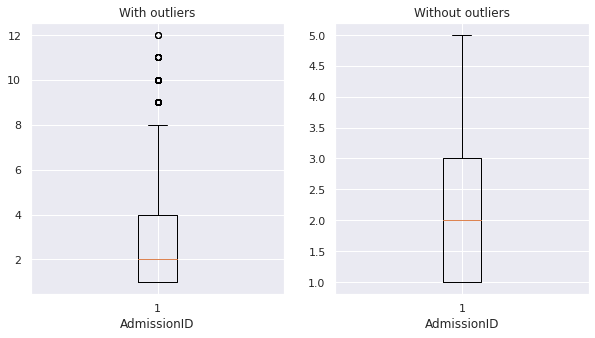

In [17]:

X=data_AdmissionsDiagnosesCorePopulatedTable.AdmissionID
X.head(10)
remove_outliers_AdmissionID=X.between(X.quantile(0.05),X.quantile(0.9))
remove_outliers_AdmissionID.head()
print(str(X[remove_outliers_AdmissionID].size)+"/"+str(X.size) + " remaining data points")
plt.boxplot(X[remove_outliers_AdmissionID])
plt.xlabel("AdmissionID")
figure,axis=plt.subplots(1,2,figsize=(10,5))
axis[0].set_title("With outliers")
axis[0].set_xlabel("AdmissionID")
axis[0].boxplot(X);

axis[1].set_title("Without outliers")
axis[1].set_xlabel("AdmissionID")
axis[1].boxplot(X[remove_outliers_AdmissionID]);

data_AdmissionsDiagnosesCorePopulatedTable['clean_AdmissionID']=X[remove_outliers_AdmissionID]

In [18]:
data_AdmissionsDiagnosesCorePopulatedTable.drop(labels='AdmissionID',axis=1,inplace=True)

In [19]:
data_AdmissionsDiagnosesCorePopulatedTable.isna().sum().to_frame().T

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,clean_AdmissionID
0,0,0,0,17460


In [20]:
data_AdmissionsDiagnosesCorePopulatedTable.fillna(method='ffill',inplace=True)
data_AdmissionsDiagnosesCorePopulatedTable.isna().sum().to_frame().T

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,clean_AdmissionID
0,0,0,0,0


In [21]:
data_AdmissionsDiagnosesCorePopulatedTable.clean_AdmissionID=data_AdmissionsDiagnosesCorePopulatedTable.clean_AdmissionID.astype('int')

In [22]:
data_AdmissionsDiagnosesCorePopulatedTable.head()

,PatientID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,clean_AdmissionID
0,54C6E968-45B3-46B1-A64F-2CE3124F2A65,F80.1,Expressive language disorder,3
1,54C6E968-45B3-46B1-A64F-2CE3124F2A65,R04.81,Acute idiopathic pulmonary hemorrhage in infants,4
2,54C6E968-45B3-46B1-A64F-2CE3124F2A65,I36,Nonrheumatic tricuspid valve disorders,5
3,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,H16.43,Localized vascularization of cornea,1
4,9DD23357-9BEB-43E4-802D-1AB7ACDD4A3A,M05.161,Rheumatoid lung disease with rheumatoid arthri...,2


## 4) Load the PatientCorePopulatedTable dataset


In [23]:
data_PatientCorePopulatedTable=pd.read_csv("/content/drive/My Drive/Colab Notebooks/PatientCorePopulatedTable.txt",sep="\t")
data_PatientCorePopulatedTable.head()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
0,F7CF0FE9-AFCD-49EF-BFB3-E42302FFA0D3,Female,1951-07-10 07:29:47.293,Asian,Single,English,13.70
1,C3935FBC-DBBA-4844-BBE4-A175FA508454,Male,1956-01-27 22:46:39.380,African American,Single,English,15.73
2,1CA33F6F-2E84-4C99-AF6A-D40F7B4DB27F,Male,1972-12-22 10:11:01.867,White,Married,English,7.09
3,81606388-2471-42A4-A6F1-1868AE25CFC3,Male,1984-01-17 00:49:06.903,Asian,Separated,Spanish,2.17
4,E3120DE9-3361-40CF-A618-265C769E75A2,Female,1978-12-21 07:24:08.957,White,Married,English,18.67


In [24]:
data_PatientCorePopulatedTable.shape

(100000, 7)

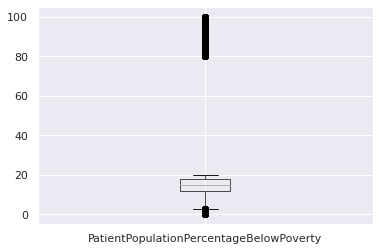

In [25]:
data_PatientCorePopulatedTable.boxplot();

70011/100000 remaining data points


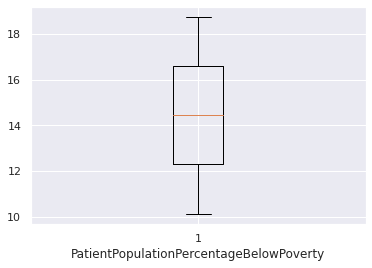

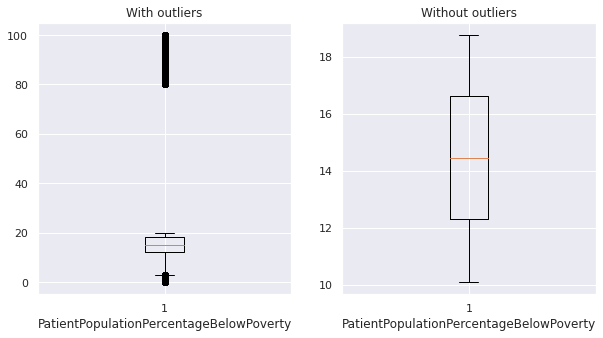

In [26]:
X=data_PatientCorePopulatedTable.PatientPopulationPercentageBelowPoverty
X.head(10)
remove_outliers_PatientPopulationPercentageBelowPoverty=X.between(X.quantile(0.1),X.quantile(0.8))
remove_outliers_PatientPopulationPercentageBelowPoverty.head()
print(str(X[remove_outliers_PatientPopulationPercentageBelowPoverty].size)+"/"+str(X.size) + " remaining data points")
plt.boxplot(X[remove_outliers_PatientPopulationPercentageBelowPoverty])
plt.xlabel("PatientPopulationPercentageBelowPoverty")
figure,axis=plt.subplots(1,2,figsize=(10,5))
axis[0].set_title("With outliers")
axis[0].set_xlabel("PatientPopulationPercentageBelowPoverty")
axis[0].boxplot(X);

axis[1].set_title("Without outliers")
axis[1].set_xlabel("PatientPopulationPercentageBelowPoverty")
axis[1].boxplot(X[remove_outliers_PatientPopulationPercentageBelowPoverty]);

data_PatientCorePopulatedTable['clean_PatientPopulationPercentageBelowPoverty']=X[remove_outliers_PatientPopulationPercentageBelowPoverty]

In [27]:
data_PatientCorePopulatedTable.drop(labels='PatientPopulationPercentageBelowPoverty',axis=1,inplace=True)

In [28]:
data_PatientCorePopulatedTable.isna().sum().to_frame().T

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty
0,0,0,0,0,0,0,29989


In [29]:
data_PatientCorePopulatedTable.fillna(method='ffill',inplace=True)

In [30]:
data_PatientCorePopulatedTable.isna().sum().to_frame().T

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty
0,0,0,0,0,0,0,0


## 5) Merging AdmissionsCorePopulatedTable withAdmissionDiagnosisCorePopulatedTable

In [31]:
data_Admissions_Core_Diagnoses_Merge=pd.merge(data_AdmissionsCorePopulatedTable,data_AdmissionsDiagnosesCorePopulatedTable,on=['PatientID','clean_AdmissionID'],how='outer')
data_Admissions_Core_Diagnoses_Merge.head()

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,2011-03-23 00:14:52.237,2011-03-28 01:57:56.467,5,M11.07,"Hydroxyapatite deposition disease, ankle and foot"
1,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1974-02-10 00:04:28.357,1974-02-16 21:04:43.333,1,C13.2,Malignant neoplasm of posterior wall of hypoph...
2,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1991-05-22 15:08:52.743,1991-05-29 12:30:08.737,2,G30,Alzheimer's disease
3,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,1995-02-26 08:01:26.477,1995-02-28 16:45:04.407,3,H67.2,"Otitis media in diseases classified elsewhere,..."
4,0A89658C-C739-45CA-9BF1-CBDDDFB922C0,2005-03-17 04:51:15.747,2005-04-04 04:04:14.160,4,M50.1,Cervical disc disorder with radiculopathy


In [32]:
data_Admissions_Core_Diagnoses_Merge.shape

(361760, 6)

## 6) Merging PatientCorePopulatedTable with AdmissionsCorePopulatedTable and AdmissionDiagnosisCorePopulatedTable

In [33]:
data_Patients_Core_Admission_Core_Diagnoses_Merge=pd.merge(data_Admissions_Core_Diagnoses_Merge,data_PatientCorePopulatedTable,on='PatientID',how='outer')
data_Patients_Core_Admission_Core_Diagnoses_Merge.head()

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,2011-03-23 00:14:52.237,2011-03-28 01:57:56.467,5,M11.07,"Hydroxyapatite deposition disease, ankle and foot",Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,18.47
1,9380F9E3-1927-42F3-9731-03A74D4E4C6B,1954-02-17 07:01:26.060,1954-03-08 12:51:04.183,1,D37.030,Neoplasm of uncertain behavior of the parotid ...,Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,18.47
2,9380F9E3-1927-42F3-9731-03A74D4E4C6B,1982-09-02 22:02:18.557,1982-09-15 00:04:09.627,2,F31.61,"Bipolar disorder, current episode mixed, mild",Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,18.47
3,9380F9E3-1927-42F3-9731-03A74D4E4C6B,2007-05-12 14:58:45.493,2007-05-25 19:08:45.560,3,T82.21,Mechanical complication of coronary artery byp...,Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,18.47
4,9380F9E3-1927-42F3-9731-03A74D4E4C6B,2007-08-22 14:23:45.920,2007-08-25 18:11:13.533,4,C10.2,Malignant neoplasm of lateral wall of oropharynx,Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,18.47


In [34]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.shape

(361760, 12)

In [35]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.isna().sum().to_frame().T

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty
0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.fillna(method='ffill',inplace=True)

In [37]:
data_Patients_Core_Admission_Core_Diagnoses_Merge.isna().sum().to_frame().T

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty
0,0,0,0,0,0,0,0,0,0,0,0,0


## 7) Load the LabsCorePopulatedTable dataset

In [40]:
data_LabsCorePopulatedTable=pd.read_csv("/content/drive/My Drive/Colab Notebooks/LabsCorePopulatedTable.txt",sep='\t',nrows=10000)
data_LabsCorePopulatedTable.head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALT/SGPT,40.0,U/L,1974-01-11 21:10:51.930000000
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: MONOCYTES,0.9,k/cumm,1974-01-11 03:14:30.127000000
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: GLUCOSE,134.2,mg/dL,1974-01-11 13:57:06.970000000
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: RDW,15.0,%,1974-01-11 02:10:43.437000000
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALBUMIN,2.8,gm/dL,1974-01-11 18:50:32.400000000


In [ ]:
data_LabsCorePopulatedTable.shape

(10000, 6)

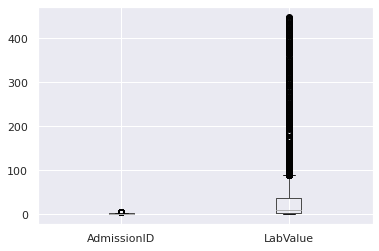

In [ ]:
data_LabsCorePopulatedTable.boxplot();

In [ ]:
X=data_LabsCorePopulatedTable.LabValue
X.head(5)

0     40.0
1      0.9
2    134.2
3     15.0
4      2.8
Name: LabValue, dtype: float64

Text(0.5, 0, 'LabValue')

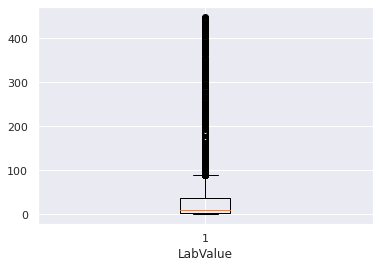

In [ ]:
plt.boxplot(data_LabsCorePopulatedTable['LabValue']);
plt.xlabel('LabValue')

4505/10000 remaining data points


Text(0.5, 0, 'LabValue')

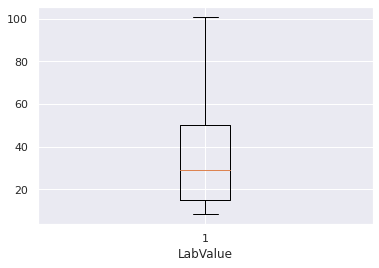

In [ ]:

remove_outliers_LabValue=X.between(X.quantile(0.45),X.quantile(0.9))
remove_outliers_LabValue.head()
print(str(X[remove_outliers_LabValue].size)+"/"+str(X.size) + " remaining data points")
plt.boxplot(X[remove_outliers_LabValue])
plt.xlabel("LabValue")

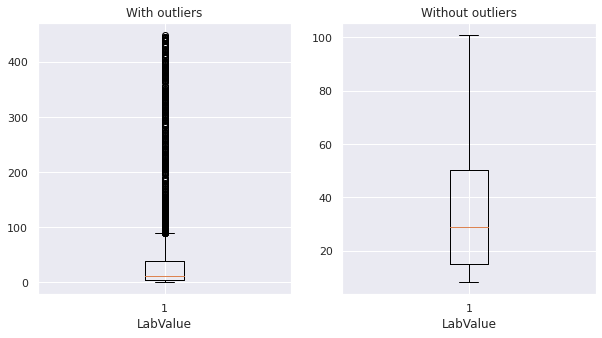

In [ ]:
figure,axis=plt.subplots(1,2,figsize=(10,5))
axis[0].set_title("With outliers")
axis[0].set_xlabel("LabValue")
axis[0].boxplot(X);

axis[1].set_title("Without outliers")
axis[1].set_xlabel("LabValue")
axis[1].boxplot(X[remove_outliers_LabValue]);

In [ ]:
data_LabsCorePopulatedTable['clean_LabValue']=X[remove_outliers_LabValue]
data_LabsCorePopulatedTable.head()

,PatientID,AdmissionID,LabName,LabValue,LabUnits,LabDateTime,clean_LabValue
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALT/SGPT,40.0,U/L,1974-01-11 21:10:51.930000000,40.0
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: MONOCYTES,0.9,k/cumm,1974-01-11 03:14:30.127000000,NaN
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: GLUCOSE,134.2,mg/dL,1974-01-11 13:57:06.970000000,NaN
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: RDW,15.0,%,1974-01-11 02:10:43.437000000,15.0
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALBUMIN,2.8,gm/dL,1974-01-11 18:50:32.400000000,NaN


In [ ]:
data_LabsCorePopulatedTable.drop(labels='LabValue',axis=1,inplace=True)

In [ ]:
X=data_LabsCorePopulatedTable.AdmissionID
X.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: AdmissionID, dtype: int64

In [ ]:
remove_outliers_AdmissionID=X.between(X.quantile(0.01),X.quantile(0.94))
remove_outliers_AdmissionID.head()
print(str(X[remove_outliers_AdmissionID].size)+"/"+str(X.size) + " remaining data points")

9411/10000 remaining data points


Text(0.5, 0, 'AdmissionID')

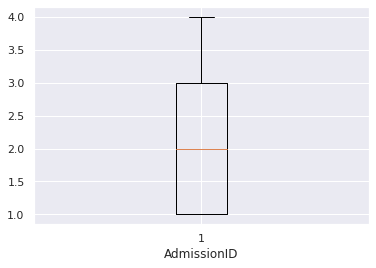

In [ ]:
plt.boxplot(X[remove_outliers_AdmissionID])
plt.xlabel("AdmissionID")

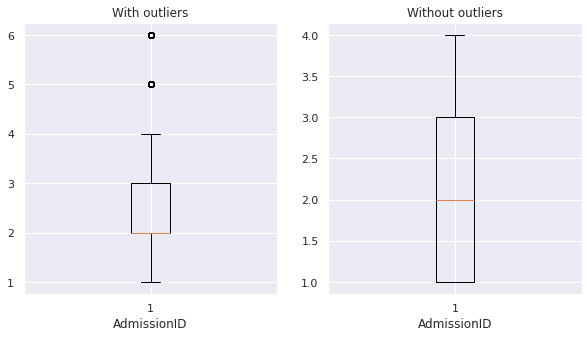

In [ ]:

figure,axis=plt.subplots(1,2,figsize=(10,5))
axis[0].set_title("With outliers")
axis[0].set_xlabel("AdmissionID")
axis[0].boxplot(X);

axis[1].set_title("Without outliers")
axis[1].set_xlabel("AdmissionID")
axis[1].boxplot(X[remove_outliers_AdmissionID]);

In [ ]:
data_LabsCorePopulatedTable['clean_AdmissionID']=X[remove_outliers_AdmissionID]

In [ ]:
data_LabsCorePopulatedTable.head()

,PatientID,AdmissionID,LabName,LabUnits,LabDateTime,clean_LabValue,clean_AdmissionID
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALT/SGPT,U/L,1974-01-11 21:10:51.930000000,40.0,1.0
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: MONOCYTES,k/cumm,1974-01-11 03:14:30.127000000,NaN,1.0
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: GLUCOSE,mg/dL,1974-01-11 13:57:06.970000000,NaN,1.0
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,CBC: RDW,%,1974-01-11 02:10:43.437000000,15.0,1.0
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,1,METABOLIC: ALBUMIN,gm/dL,1974-01-11 18:50:32.400000000,NaN,1.0


In [ ]:
data_LabsCorePopulatedTable.drop(labels='AdmissionID',axis=1,inplace=True)

In [ ]:
data_LabsCorePopulatedTable.head()

,PatientID,LabName,LabUnits,LabDateTime,clean_LabValue,clean_AdmissionID
0,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,METABOLIC: ALT/SGPT,U/L,1974-01-11 21:10:51.930000000,40.0,1.0
1,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,CBC: MONOCYTES,k/cumm,1974-01-11 03:14:30.127000000,NaN,1.0
2,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,METABOLIC: GLUCOSE,mg/dL,1974-01-11 13:57:06.970000000,NaN,1.0
3,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,CBC: RDW,%,1974-01-11 02:10:43.437000000,15.0,1.0
4,BF7165BC-CCD9-4CE4-944F-E3C9786B7BF3,METABOLIC: ALBUMIN,gm/dL,1974-01-11 18:50:32.400000000,NaN,1.0


In [ ]:
data_LabsCorePopulatedTable.isna().sum().to_frame().T

,PatientID,LabName,LabUnits,LabDateTime,clean_LabValue,clean_AdmissionID
0,0,0,0,0,5495,589


In [ ]:
data_LabsCorePopulatedTable.fillna(method='ffill',inplace=True)

In [ ]:
data_LabsCorePopulatedTable.isna().sum().to_frame().T

,PatientID,LabName,LabUnits,LabDateTime,clean_LabValue,clean_AdmissionID
0,0,0,0,0,0,0


In [ ]:
Counter(data_LabsCorePopulatedTable.LabName)

Counter({'CBC: ABSOLUTE LYMPHOCYTES': 271,
         'CBC: ABSOLUTE NEUTROPHILS': 266,
         'CBC: BASOPHILS': 288,
         'CBC: EOSINOPHILS': 284,
         'CBC: HEMATOCRIT': 287,
         'CBC: HEMOGLOBIN': 279,
         'CBC: LYMPHOCYTES': 278,
         'CBC: MCH': 289,
         'CBC: MCHC': 286,
         'CBC: MEAN CORPUSCULAR VOLUME': 294,
         'CBC: MONOCYTES': 302,
         'CBC: NEUTROPHILS': 300,
         'CBC: PLATELET COUNT': 288,
         'CBC: RDW': 294,
         'CBC: RED BLOOD CELL COUNT': 281,
         'CBC: WHITE BLOOD CELL COUNT': 279,
         'METABOLIC: ALBUMIN': 278,
         'METABOLIC: ALK PHOS': 269,
         'METABOLIC: ALT/SGPT': 292,
         'METABOLIC: ANION GAP': 280,
         'METABOLIC: AST/SGOT': 279,
         'METABOLIC: BILI TOTAL': 291,
         'METABOLIC: BUN': 282,
         'METABOLIC: CALCIUM': 286,
         'METABOLIC: CARBON DIOXIDE': 295,
         'METABOLIC: CHLORIDE': 277,
         'METABOLIC: CREATININE': 279,
         'METABOLIC: 

## 8) Merging LabsCorePopulatedTable with PatientCorePopulatedTable, AdmissionsCorePopulatedTable and AdmissionDiagnosisCorePopulatedTable

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge=pd.merge(data_Patients_Core_Admission_Core_Diagnoses_Merge,data_LabsCorePopulatedTable,on=['PatientID','clean_AdmissionID'],how='outer')
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.head()

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty,LabName,LabUnits,LabDateTime,clean_LabValue
0,9380F9E3-1927-42F3-9731-03A74D4E4C6B,2011-03-23 00:14:52.237,2011-03-28 01:57:56.467,5.0,M11.07,"Hydroxyapatite deposition disease, ankle and foot",Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,18.47,NaN,NaN,NaN,NaN
1,9380F9E3-1927-42F3-9731-03A74D4E4C6B,1954-02-17 07:01:26.060,1954-03-08 12:51:04.183,1.0,D37.030,Neoplasm of uncertain behavior of the parotid ...,Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,18.47,NaN,NaN,NaN,NaN
2,9380F9E3-1927-42F3-9731-03A74D4E4C6B,1982-09-02 22:02:18.557,1982-09-15 00:04:09.627,2.0,F31.61,"Bipolar disorder, current episode mixed, mild",Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,18.47,NaN,NaN,NaN,NaN
3,9380F9E3-1927-42F3-9731-03A74D4E4C6B,2007-05-12 14:58:45.493,2007-05-25 19:08:45.560,3.0,T82.21,Mechanical complication of coronary artery byp...,Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,18.47,NaN,NaN,NaN,NaN
4,9380F9E3-1927-42F3-9731-03A74D4E4C6B,2007-08-22 14:23:45.920,2007-08-25 18:11:13.533,4.0,C10.2,Malignant neoplasm of lateral wall of oropharynx,Male,1930-08-12 10:59:03.917,Unknown,Divorced,English,18.47,NaN,NaN,NaN,NaN


In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.shape

(27711, 16)

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.isna().sum().to_frame()

,0
PatientID,0
AdmissionStartDate,9349
AdmissionEndDate,9349
clean_AdmissionID,0
PrimaryDiagnosisCode,9349
PrimaryDiagnosisDescription,9349
PatientGender,9349
PatientDateOfBirth,9349
PatientRace,9349
PatientMaritalStatus,9349


In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.fillna(method='ffill',inplace=True)
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.isna().sum().to_frame().T

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty,LabName,LabUnits,LabDateTime,clean_LabValue
0,0,0,0,0,0,0,0,0,0,0,0,0,3970,3970,3970,3970


In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.fillna(method='bfill',inplace=True)
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.isna().sum().to_frame().T

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty,LabName,LabUnits,LabDateTime,clean_LabValue
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.shape

(27711, 16)

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.to_csv('/content/drive/My Drive/Colab Notebooks/Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge_WithoutBinary_.csv')

## 9) Using One-Hot Label Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [ ]:
pd.get_dummies(data_LabsCorePopulatedTable.LabName)

,CBC: ABSOLUTE LYMPHOCYTES,CBC: ABSOLUTE NEUTROPHILS,CBC: BASOPHILS,CBC: EOSINOPHILS,CBC: HEMATOCRIT,CBC: HEMOGLOBIN,CBC: LYMPHOCYTES,CBC: MCH,CBC: MCHC,CBC: MEAN CORPUSCULAR VOLUME,CBC: MONOCYTES,CBC: NEUTROPHILS,CBC: PLATELET COUNT,CBC: RDW,CBC: RED BLOOD CELL COUNT,CBC: WHITE BLOOD CELL COUNT,METABOLIC: ALBUMIN,METABOLIC: ALK PHOS,METABOLIC: ALT/SGPT,METABOLIC: ANION GAP,METABOLIC: AST/SGOT,METABOLIC: BILI TOTAL,METABOLIC: BUN,METABOLIC: CALCIUM,METABOLIC: CARBON DIOXIDE,METABOLIC: CHLORIDE,METABOLIC: CREATININE,METABOLIC: GLUCOSE,METABOLIC: POTASSIUM,METABOLIC: SODIUM,METABOLIC: TOTAL PROTEIN,URINALYSIS: PH,URINALYSIS: RED BLOOD CELLS,URINALYSIS: SPECIFIC GRAVITY,URINALYSIS: WHITE BLOOD CELLS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
data_LabsCorePopulatedTable['LabName'].head(10)


0             METABOLIC: ALT/SGPT
1                  CBC: MONOCYTES
2              METABOLIC: GLUCOSE
3                        CBC: RDW
4              METABOLIC: ALBUMIN
5     URINALYSIS: RED BLOOD CELLS
6     CBC: WHITE BLOOD CELL COUNT
7    URINALYSIS: SPECIFIC GRAVITY
8                CBC: NEUTROPHILS
9            METABOLIC: POTASSIUM
Name: LabName, dtype: object

In [ ]:
label_encoder=LabelEncoder()
integer_encoded = label_encoder.fit_transform(data_LabsCorePopulatedTable.LabName)
print(integer_encoded)

[18 10 27 ... 21 30 15]


## 1) CBC Absolute Lymphocytes
## <20 % -Low, 20-40% - Normal, >40% - High

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: ABSOLUTE LYMPHOCYTES'
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: ABSOLUTE LYMPHOCYTES').all() and (data_LabsCorePopulatedTable['clean_LabValue']<20.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: ABSOLUTE LYMPHOCYTES').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=20.0).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=40.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: ABSOLUTE LYMPHOCYTES').all() and (data_LabsCorePopulatedTable['clean_LabValue']>40.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2

## 2) CBC Absolute Neutrophils
# 45-75% -Normal, >75% -Mild

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: ABSOLUTE NEUTROPHILS'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:

if((data_LabsCorePopulatedTable['LabName']=='CBC: ABSOLUTE NEUTROPHILS').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=45.0).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=75.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: ABSOLUTE NEUTROPHILS').all() and (data_LabsCorePopulatedTable['clean_LabValue']>75.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1

## 3) CBC Hematocrit
# <38.3 %- low
# 38.3-48.6% - Normal
# >48.6% - high


In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: HEMATOCRIT'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: HEMATOCRIT').all() and (data_LabsCorePopulatedTable['clean_LabValue']<38.3).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: HEMATOCRIT').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=38.3).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=48.6).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: HEMATOCRIT').all() and (data_LabsCorePopulatedTable['clean_LabValue']>48.6).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2

## 4) CBC Hemaglobin
# <135 g/L - low
# 135-175 g/L - normal
# >175 g/L - high

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: HEMOGLOBIN'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: HEMOGLOBIN').all() and (data_LabsCorePopulatedTable['clean_LabValue']<135.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: HEMOGLOBIN').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=135.0).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=175.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: HEMOGLOBIN').all() and (data_LabsCorePopulatedTable['clean_LabValue']>175.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2

## 5) CBC MCH
# >33.2 pg - High
# 27.5 - 33.2 pg - Normal
# <27.5 pg - low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: MCH'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: MCH').all() and (data_LabsCorePopulatedTable['clean_LabValue']<27.5).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: MCH').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=27.5).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=33.2).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: MCH').all() and (data_LabsCorePopulatedTable['clean_LabValue']>33.2).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2


## 6) CBC MCHC
# >35.5 g/dL - High
# 33.4 - 35.5 g/dL - Normal
# <33.4 g/dL - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: MCHC'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: MCHC').all() and (data_LabsCorePopulatedTable['clean_LabValue']<33.4).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: MCHC').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=33.4).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=35.5).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: MCHC').all() and (data_LabsCorePopulatedTable['clean_LabValue']>35.5).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2


## 7) CBC Mean Corpuscular Volume
# >95 fl - High
# 80 - 95 fl - Normal
# <80 fl - low


In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: MEAN CORPUSCULAR VOLUME'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: MEAN CORPUSCULAR VOLUME').all() and (data_LabsCorePopulatedTable['clean_LabValue']<80.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: MEAN CORPUSCULAR VOLUME').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=80.0).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=95.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: MEAN CORPUSCULAR VOLUME').all() and (data_LabsCorePopulatedTable['clean_LabValue']>95.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2


## 8) CBC Neutrophils
# >35.5 g/dL - High
# 33.4 - 35.5 g/dL - Normal
# <33.4 g/dL - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: NEUTROPHILS'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: NEUTROPHILS').all() and (data_LabsCorePopulatedTable['clean_LabValue']<33.4).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: NEUTROPHILS').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=33.4).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=35.5).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: NEUTROPHILS').all() and (data_LabsCorePopulatedTable['clean_LabValue']>35.5).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2



## 9) CBC RDW(Red cell distribution width)
# >16.1 %- High
# 12.2 - 16.1 % - Normal
# <12.2 % - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: RDW'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: RDW').all() and (data_LabsCorePopulatedTable['clean_LabValue']<12.2).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: RDW').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=12.2).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=16.1).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: RDW').all() and (data_LabsCorePopulatedTable['clean_LabValue']>16.1).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2

## 10) CBC White Blood Cell Count
# >9.6  k/cumm - High
# 3.4 - 9.6 k/cumm - Normal
# <3.4 k/cumm - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='CBC: WHITE BLOOD CELL COUNT'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
if((data_LabsCorePopulatedTable['LabName']=='CBC: WHITE BLOOD CELL COUNT').all() and (data_LabsCorePopulatedTable['clean_LabValue']<3.4).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='CBC: WHITE BLOOD CELL COUNT').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=3.4).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=9.6).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='CBC: WHITE BLOOD CELL COUNT').all() and (data_LabsCorePopulatedTable['clean_LabValue']>9.6).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2

## 11) Metabolic ALK PHOS
# >140  U/L - High
# 20 - 140 U/L - Normal
# <20 U/L- Low


In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALK PHOS'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALK PHOS').all() and (data_LabsCorePopulatedTable['clean_LabValue']<20.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALK PHOS').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=20.0).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=140.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALK PHOS').all() and (data_LabsCorePopulatedTable['clean_LabValue']>140.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 12) Metabolic ALT/SGPT
# >56  k/cumm - High
# 7 - 56 k/cumm - Normal
# <7 k/cumm - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALT/SGPT'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALT/SGPT').all() and (data_LabsCorePopulatedTable['clean_LabValue']<7.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALT/SGPT').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=7.0).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=7.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ALT/SGPT').all() and (data_LabsCorePopulatedTable['clean_LabValue']>56.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 13) Metabolic ANION GAP
# >11 mEq/L - High
# <3.5 mEq/L - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: ANION GAP'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded

if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ANION GAP').all() and (data_LabsCorePopulatedTable['clean_LabValue']<3.5).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ANION GAP').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=3.5).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=11.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: ANION GAP').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=11.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 14) Metabolic AST/SGOT
# >40  k/cumm - High
# 5 - 40 k/cumm - Normal
# <5 k/cumm - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: AST/SGOT'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: AST/SGOT').all() and (data_LabsCorePopulatedTable['clean_LabValue']<5.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: AST/SGOT').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=5.0).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=40.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: AST/SGOT').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=40.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 15) Metabolic BUN
# >20  mg/dL - High
# 7 - 20 mg/dL - Normal
# <7 mg/dL - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: BUN'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: BUN').all() and (data_LabsCorePopulatedTable['clean_LabValue']<7.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: BUN').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=7.0).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=20.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: BUN').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=20.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 16) Metabolic CALCIUM
# >10.2  mg/dL - High
# 8.6 - 10.2 mg/dL - Normal
# <8.6 mg/dL - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: CALCIUM'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CALCIUM').all() and (data_LabsCorePopulatedTable['clean_LabValue']<8.6).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CALCIUM').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=8.6).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=10.2).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CALCIUM').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=10.2).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 17) Metabolic CHLORIDE 
# >106  mmol/L - High
# 96 - 106 mmol/L - Normal
# <96 mmol/L - Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: CHLORIDE'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CHLORIDE').all() and (data_LabsCorePopulatedTable['clean_LabValue']<96.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CHLORIDE').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=96.0).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=106.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CHLORIDE').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=106.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 18) Metabolic CARBON DIOXIDE
# >29  mmol/L- High
# 22 - 29 mmol/L- Normal
# <22 mmol/L - Low


In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: CARBON DIOXIDE'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CARBON DIOXIDE').all() and (data_LabsCorePopulatedTable['clean_LabValue']<22.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CARBON DIOXIDE').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=22.0).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=29.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: CARBON DIOXIDE').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=29.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 19) Metabolic GLUCOSE
# >=126 mg/dL - High
# 100 - 125 mg/dL - Normal
# 70-99 mg/dL- Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: GLUCOSE'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: GLUCOSE').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=70.0) and (data_LabsCorePopulatedTable['clean_LabValue']<=99.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: GLUCOSE').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=100.0).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=125.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: GLUCOSE').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=126.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 20) Metabolic Total Protein
# >8.3  gm/dL - High
# 6 - 8.3 gm/dL - Normal
# <6 gm/dL- Low

In [ ]:
data_LabsCorePopulatedTable['LabName']=='METABOLIC: TOTAL PROTEIN'
onehot_encoder = OneHotEncoder(sparse=False)

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
data_LabsCorePopulatedTable['LabName']=onehot_encoded


if((data_LabsCorePopulatedTable['LabName']=='METABOLIC: TOTAL PROTEIN').all() and (data_LabsCorePopulatedTable['clean_LabValue']<6.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=0
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: TOTAL PROTEIN').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=6.0).all() and (data_LabsCorePopulatedTable['clean_LabValue']<=40.0).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=1
elif((data_LabsCorePopulatedTable['LabName']=='METABOLIC: TOTAL PROTEIN').all() and (data_LabsCorePopulatedTable['clean_LabValue']>=8.3).all()):
  data_LabsCorePopulatedTable['clean_LabValue']=2

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
Counter(data_LabsCorePopulatedTable.LabName)

Counter({0.0: 9729, 1.0: 271})

In [ ]:
data_LabsCorePopulatedTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          10000 non-null  object 
 1   LabName            10000 non-null  float64
 2   LabUnits           10000 non-null  object 
 3   LabDateTime        10000 non-null  object 
 4   clean_LabValue     10000 non-null  float64
 5   clean_AdmissionID  10000 non-null  float64
dtypes: float64(3), object(3)
memory usage: 468.9+ KB


In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.isna().sum().to_frame().T

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty,LabName,LabUnits,LabDateTime,clean_LabValue
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.shape

(27711, 16)

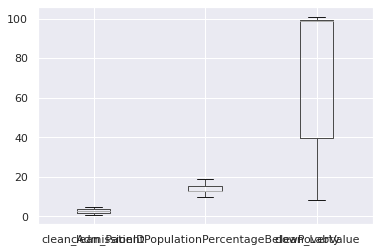

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.boxplot();

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27711 entries, 0 to 27710
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   PatientID                                      27711 non-null  object 
 1   AdmissionStartDate                             27711 non-null  object 
 2   AdmissionEndDate                               27711 non-null  object 
 3   clean_AdmissionID                              27711 non-null  float64
 4   PrimaryDiagnosisCode                           27711 non-null  object 
 5   PrimaryDiagnosisDescription                    27711 non-null  object 
 6   PatientGender                                  27711 non-null  object 
 7   PatientDateOfBirth                             27711 non-null  object 
 8   PatientRace                                    27711 non-null  object 
 9   PatientMaritalStatus                           277

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
a=['PatientID','AdmissionStartDate','AdmissionEndDate','PrimaryDiagnosisCode',
   'PrimaryDiagnosisDescription','PatientGender','PatientDateOfBirth','PatientMaritalStatus','PatientRace',
  'PatientLanguage','LabName','LabUnits','LabDateTime']
for i in a:
    data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge[[i]]=enc.fit_transform(data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge[i])

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27711 entries, 0 to 27710
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   PatientID                                      27711 non-null  int64  
 1   AdmissionStartDate                             27711 non-null  int64  
 2   AdmissionEndDate                               27711 non-null  int64  
 3   clean_AdmissionID                              27711 non-null  float64
 4   PrimaryDiagnosisCode                           27711 non-null  int64  
 5   PrimaryDiagnosisDescription                    27711 non-null  int64  
 6   PatientGender                                  27711 non-null  int64  
 7   PatientDateOfBirth                             27711 non-null  int64  
 8   PatientRace                                    27711 non-null  int64  
 9   PatientMaritalStatus                           277

In [ ]:
corr=data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.corr()

In [ ]:
corr

,PatientID,AdmissionStartDate,AdmissionEndDate,clean_AdmissionID,PrimaryDiagnosisCode,PrimaryDiagnosisDescription,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,clean_PatientPopulationPercentageBelowPoverty,LabName,LabUnits,LabDateTime,clean_LabValue
PatientID,1.000000,-0.017688,-0.017695,-0.061673,-0.026602,0.006905,0.013542,0.005403,0.009294,-0.008026,-0.008171,-0.011233,0.006033,0.009469,0.013496,-0.016684
AdmissionStartDate,-0.017688,1.000000,0.999998,0.407778,0.389674,-0.381640,0.122741,0.207754,-0.128543,-0.096042,-0.089058,-0.063703,0.003278,0.171169,0.263475,-0.048632
AdmissionEndDate,-0.017695,0.999998,1.000000,0.407726,0.390226,-0.382328,0.122977,0.207636,-0.128765,-0.096206,-0.089196,-0.063825,0.003296,0.171460,0.263827,-0.048746
clean_AdmissionID,-0.061673,0.407778,0.407726,1.000000,0.150599,-0.143648,-0.170176,-0.017853,0.140432,0.118960,0.120511,0.093860,-0.144069,0.054291,0.175284,0.325144
PrimaryDiagnosisCode,-0.026602,0.389674,0.390226,0.150599,1.000000,-0.505355,0.182585,0.003837,-0.176949,-0.113738,-0.149898,-0.102075,0.015049,0.229919,0.331669,-0.088307
PrimaryDiagnosisDescription,0.006905,-0.381640,-0.382328,-0.143648,-0.505355,1.000000,-0.211144,-0.001259,0.188063,0.142590,0.170868,0.135145,-0.042811,-0.221673,-0.308694,0.154205
PatientGender,0.013542,0.122741,0.122977,-0.170176,0.182585,-0.211144,1.000000,-0.076989,-0.220456,-0.211662,-0.184914,-0.194637,0.140787,0.108940,0.239278,-0.356465
PatientDateOfBirth,0.005403,0.207754,0.207636,-0.017853,0.003837,-0.001259,-0.076989,1.000000,0.054146,0.041060,0.049952,0.042066,-0.051972,-0.000706,-0.039622,0.122112
PatientRace,0.009294,-0.128543,-0.128765,0.140432,-0.176949,0.188063,-0.220456,0.054146,1.000000,0.156417,0.128214,0.134882,-0.107708,-0.095910,-0.210941,0.276368
PatientMaritalStatus,-0.008026,-0.096042,-0.096206,0.118960,-0.113738,0.142590,-0.211662,0.041060,0.156417,1.000000,0.105899,0.118360,-0.095954,-0.077150,-0.164398,0.243660


## Correlation  Matrix

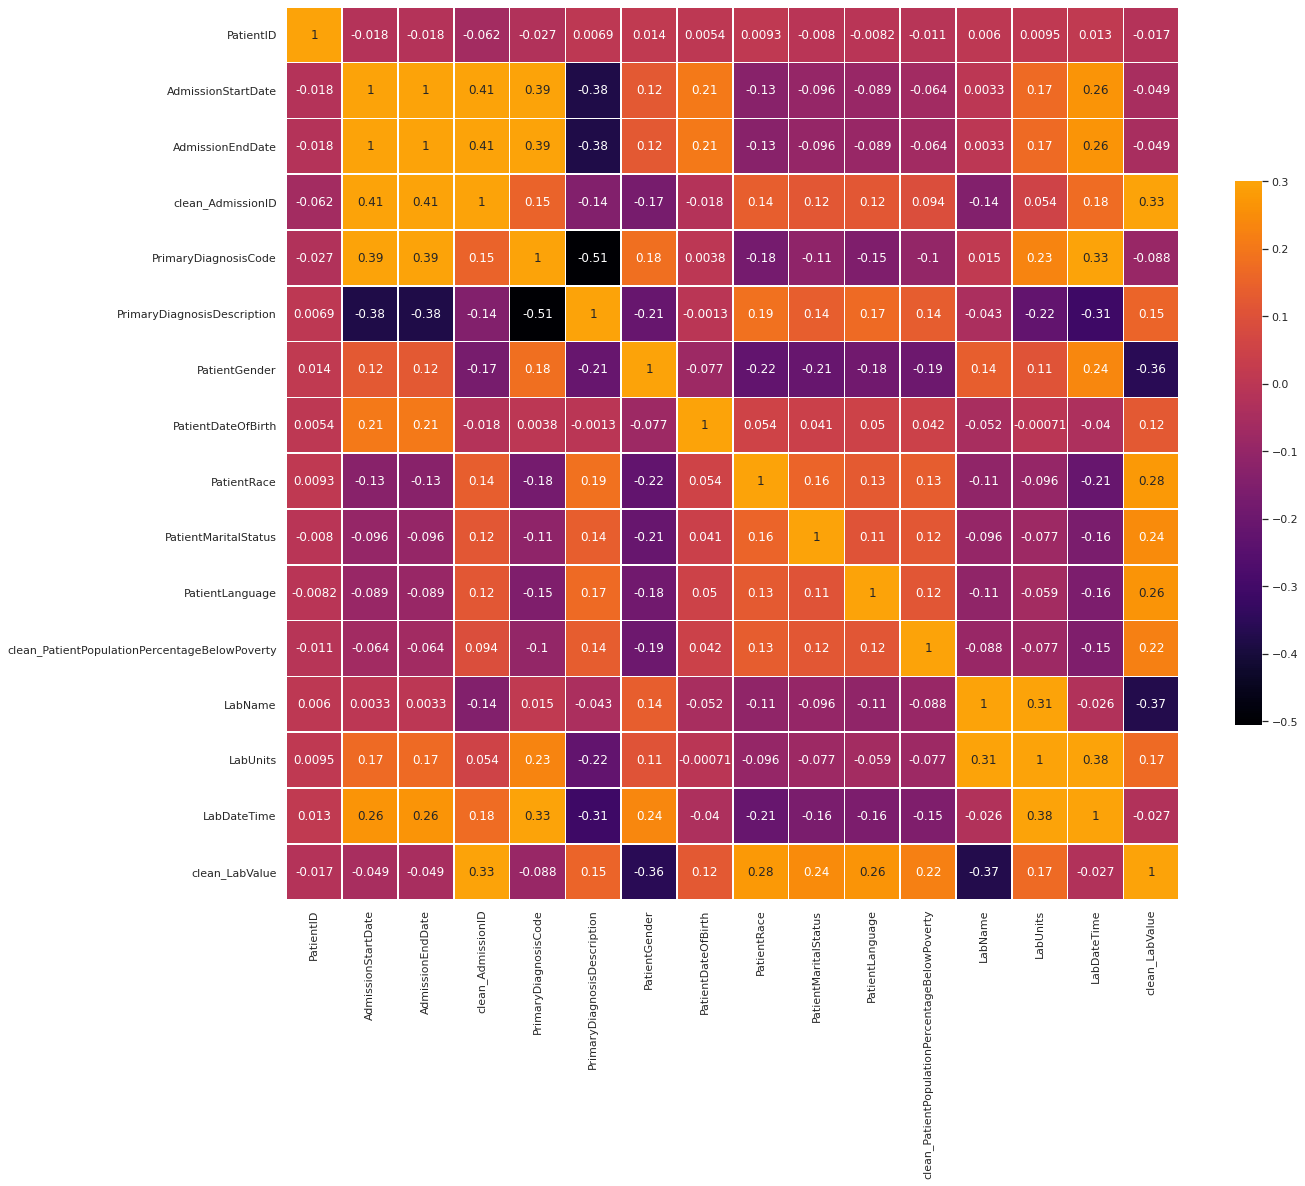

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,cmap='inferno',vmax=.3,center=0,square=True,linewidths=.6,cbar_kws={'shrink':.5},annot=True)

## 10) Counting the values in Lab Value columns

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.clean_LabValue.count()

27711

In [ ]:
data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.columns

Index(['PatientID', 'AdmissionStartDate', 'AdmissionEndDate',
       'clean_AdmissionID', 'PrimaryDiagnosisCode',
       'PrimaryDiagnosisDescription', 'PatientGender', 'PatientDateOfBirth',
       'PatientRace', 'PatientMaritalStatus', 'PatientLanguage',
       'clean_PatientPopulationPercentageBelowPoverty', 'LabName', 'LabUnits',
       'LabDateTime', 'clean_LabValue'],
      dtype='object')

## 11) Defining X and y variables

In [ ]:
X=data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.loc[:,['PatientGender','PatientDateOfBirth','PatientRace','PrimaryDiagnosisDescription','LabName','clean_LabValue']]
X.head(200)

,PatientGender,PatientDateOfBirth,PatientRace,PrimaryDiagnosisDescription,LabName,clean_LabValue
0,1,864,2,1076,18,40.0
1,1,864,2,1699,18,40.0
2,1,864,2,319,18,40.0
3,1,864,2,1593,18,40.0
4,1,864,2,1360,18,40.0
...,...,...,...,...,...,...
195,0,4935,3,1015,18,40.0
196,0,4935,3,674,18,40.0
197,0,4935,3,2231,18,40.0
198,0,5266,3,2491,18,40.0


In [ ]:
y=data_Labs_Core_Patients_Core_Admission_Core_Diagnoses_Merge.PrimaryDiagnosisCode
y.head()

0    1930
1     678
2    1080
3    2489
4     135
Name: PrimaryDiagnosisCode, dtype: int64

## 12) Using train-test split to split the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)
print(" X train shape = ",X_train.shape)
print(" y train shape = ",y_train.shape)
print(" X test shape = ",X_test.shape)
print(" y test shape = ",y_test.shape)

 X train shape =  (22168, 6)
 y train shape =  (22168,)
 X test shape =  (5543, 6)
 y test shape =  (5543,)


## 13) Using different kinds of Machine Learning Classification type Algorithms

## 1) Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [ ]:
model=RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)
y_train_predict=model.predict(X_train)
y_test_predict=model.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,y_test_predict))
pd.crosstab(y_test,y_test_predict)

In [ ]:
print("Accuracy of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ",accuracy_score(y_test,y_test_predict)*100)
print("Precision = ",precision_score(y_test,y_test_predict,average='weighted')*100)
print("Recall = ",recall_score(y_test,y_test_predict,average='weighted')*100)
print("F1 score = ", f1_score(y_test,y_test_predict,average='weighted')*100)

## 2) Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt=DecisionTreeClassifier(criterion='gini',splitter='best',random_state=0,max_depth=4)
model_dt.fit(X_train,y_train)
y_train_predict=model_dt.predict(X_train)
y_test_predict=model_dt.predict(X_test)
print(confusion_matrix(y_test,y_test_predict))
pd.crosstab(y_test,y_test_predict)

In [ ]:
print("Accuracy of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ",accuracy_score(y_test,y_test_predict)*100)
print("Precision = ",precision_score(y_test,y_test_predict,average='weighted')*100)
print("Recall = ",recall_score(y_test,y_test_predict,average='weighted')*100)
print("F1 score = ", f1_score(y_test,y_test_predict,average='weighted')*100)

## Exporting the model on joblib

In [ ]:
from sklearn.externals import joblib
joblib.dump(model,'EHR_Trained_Model.ml')

In [ ]:
model=joblib.load('EHR_Trained_Model.ml')

In [ ]:
model.predict([[1,1,0,11,2,3.8]])